In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, least_squares, minimize

In [2]:
def linear_model(x, a, b):
    return a*x+b

In [3]:
x = np.linspace(0,10,100)
y = 2.5*x+1.5+np.random.normal(0,1,size=x.size)

In [4]:
popt, pcov = curve_fit(linear_model, x, y)

In [5]:
popt

array([2.55418037, 1.11449867])

In [8]:
perr = np.sqrt(np.diag(pcov))
perr

array([0.02871127, 0.16618266])

In [9]:
def sinusoidal_model(t, A, omega, phi, C):
    return A * np.sin(omega * t + phi) + C

In [10]:
t_data = np.linspace(0, 10, 100) 
flux = 2.0 * np.sin(2 * np.pi * t_data / 5 + 0.1) + 10.0 + np.random.normal(0, 0.2, size=t_data.size)

In [16]:
popt, pcov = curve_fit(sinusoidal_model, t_data, flux, p0=[2, 2*np.pi/5, 0.1,10])

In [17]:
perr = np.sqrt(np.diag(pcov))
perr

array([0.02787109, 0.00461352, 0.02711451, 0.01943068])

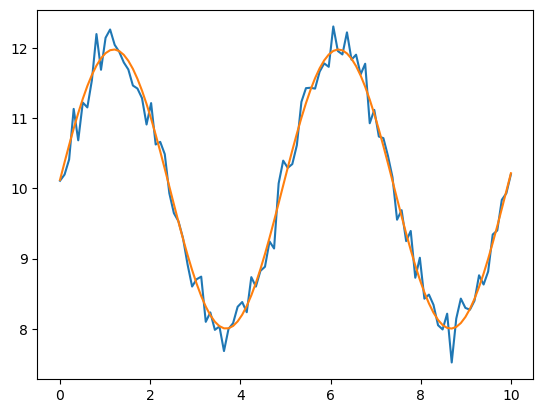

In [18]:
plt.plot(t_data,flux,label='data')
plt.plot(t_data,sinusoidal_model(t_data,*popt),label='model')

In [19]:
def model(pars, xpts):
    return pars[0]*np.exp(-(xpts-pars[1])**2/(2*pars[2])**2)

In [20]:
def lsq_residual(pars, xpts, data):
	return data-model(pars,xpts)

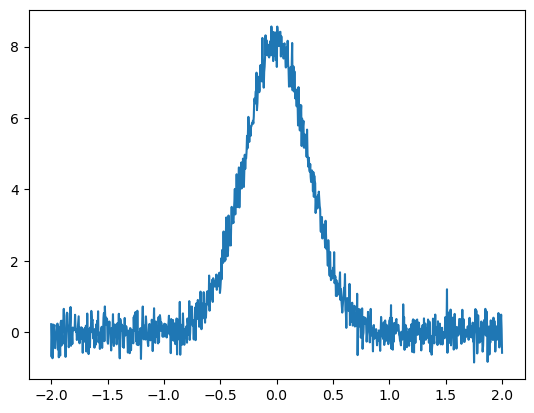

In [23]:
xpts = np.linspace(-2,2,1000)
true_model = model([8., 0., 0.2], xpts)
ypts = true_model+np.random.normal(scale=0.3,size=xpts.size)
plt.plot(xpts,ypts)
plt.show()

In [26]:
result = least_squares(lsq_residual, x0=[3,1,0.5], args=(xpts,ypts))
result

 active_mask: array([0., 0., 0.])
        cost: 46.74581471522485
         fun: array([ 2.29226928e-01, -6.81939240e-01, -1.48945694e-01, -7.23764582e-01,
        2.19981675e-01, -4.21394351e-01,  2.10572087e-01, -6.00561205e-02,
       -4.13721161e-01, -4.42523934e-01, -2.00571193e-01, -8.13978263e-02,
        2.08270942e-01,  1.33410868e-01,  2.45848918e-01, -4.78831332e-01,
        1.69957669e-01, -6.97909449e-01, -2.80874764e-01, -2.41503047e-01,
       -6.49840224e-01,  2.65346411e-01,  3.23574662e-01, -3.66805957e-01,
        3.25448015e-01,  2.01862220e-01,  1.15786400e-02,  8.71866680e-02,
        6.58896974e-01, -3.18466579e-01, -1.08861352e-01, -9.77183654e-02,
       -6.86169065e-01,  6.21738537e-02,  4.63721902e-01,  5.51697850e-01,
        5.32494026e-01,  2.04935869e-01, -1.00058963e-01, -4.16035004e-01,
       -2.81818053e-01,  6.25184446e-02,  2.73944939e-01,  7.10182297e-01,
       -3.75331074e-01, -1.80287015e-01, -8.56098643e-02, -3.22431596e-01,
        1.35944158e-

In [31]:
jacobian = result.jac
cov_matrix =  np.linalg.inv(np.dot(jacobian.T, jacobian))
uncertainties = np.sqrt(np.diag(cov_matrix))
uncertainties

array([0.10917408, 0.00443052, 0.00313285])

In [32]:
def chi2_residual(pars, xpts, data):
    return np.sum((data-model(pars,xpts))**2)

In [34]:
result2 = minimize(chi2_residual, x0=[3,1,0.5], args=(xpts,ypts))
result2

      fun: 93.49162943046142
 hess_inv: array([[ 5.99061714e-03,  1.47616784e-06, -1.00637536e-04],
       [ 1.47616784e-06,  9.88698678e-06, -2.46026851e-08],
       [-1.00637536e-04, -2.46026851e-08,  4.99286279e-06]])
      jac: array([ 1.52587891e-05, -6.96182251e-05,  4.95910645e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 236
      nit: 18
     njev: 56
   status: 2
  success: False
        x: array([ 8.08921258e+00, -1.16309089e-03,  2.01028080e-01])